In [1]:
import pandas as pd
from ptrail.core.TrajectoryDF import PTRAILDataFrame
from ptrail.features.kinematic_features import KinematicFeatures
from ptrail.features.temporal_features import TemporalFeatures
import matplotlib.pyplot as plt
import ptrail.utilities.constants as const
from ptrail.preprocessing.interpolation import Interpolation
from ptrail.preprocessing.filters import Filters

# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 500)


pdf = pd.read_csv('./data/starkey.csv')
starkey = PTRAILDataFrame(data_set=pdf,
                          latitude='lat',
                          longitude='lon',
                          datetime='DateTime',
                          traj_id='Id')
print("Size of the Dataset: {}".format(starkey.shape))
starkey.head(5)

Size of the Dataset: (287136, 15)


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum Species  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409       D   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409       D   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409       D   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409       D   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409       D   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt  
traj_id   DateTime                    
880109D01 1995-04-13 13:40:06   1.47  
          1995-04-15 12:16:15   1.59  
          1995-04-15 21:39:38   1.34  
          1995-04-16 03:32:14   1.50  
          1995-04-16 04:08:28   1.34

In [2]:
starkey.traj_id.value_counts()

910313E37    4007
890424E08    3315
921228E06    3172
930304E16    3136
940110D01    2996
             ... 
OSUX92071      99
OSUX92008      92
OSUX91121      52
OSUX91143      52
950227D02      43
Name: traj_id, Length: 253, dtype: int64

In [3]:
t1 = starkey.loc[starkey.index.get_level_values(const.TRAJECTORY_ID).isin(['960313E02'])]
t1 = PTRAILDataFrame(data_set=t1.reset_index(), latitude='lat', longitude='lon', datetime='DateTime', traj_id='Id')
filtered_t1 = Filters.hampel_outlier_detection(dataframe=t1, column_name='lat')
interpolated_t1 = Interpolation.interpolate_position(dataframe=filtered_t1, time_jump=3600*2, ip_type='cubic')
temporal_features = TemporalFeatures.generate_temporal_features(interpolated_t1)
kinematic_features = KinematicFeatures.generate_kinematic_features(temporal_features)

/home/yjharanwala/Desktop/PTRAIL/ptrail/preprocessing/filters.py:748: UserWarning: If kinematic features have been generated on the dataframe, then make sure to generate them again as outlier detection drops the point from the dataframe and does not run the kinematic features again.
  warnings.warn("If kinematic features have been generated on the dataframe, then make "


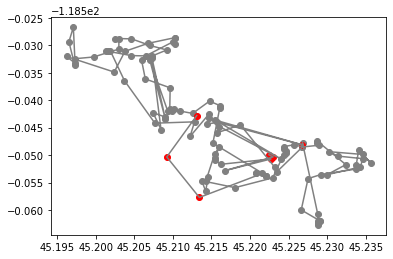

In [4]:
t1_coords = list(zip(t1['lat'], t1['lon']))
ft1_coords = list(zip(filtered_t1['lat'], filtered_t1['lon']))

fig = plt.figure()
ax = fig.add_subplot()
for i in range(len(t1_coords)):
    if t1_coords[i] in ft1_coords:
        ax.scatter(t1_coords[i][0], t1_coords[i][1], color='grey')
    else:
        ax.scatter(t1_coords[i][0], t1_coords[i][1], color='red')

ax.plot(t1['lat'], t1['lon'], color='grey')

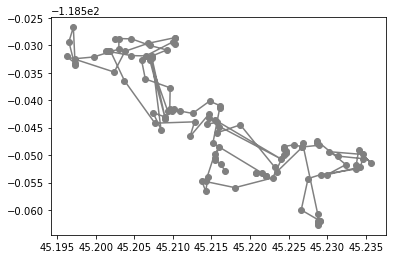

In [5]:
plt.scatter(filtered_t1['lat'], filtered_t1['lon'], color='grey'),
plt.plot(filtered_t1['lat'], filtered_t1['lon'], color='grey')

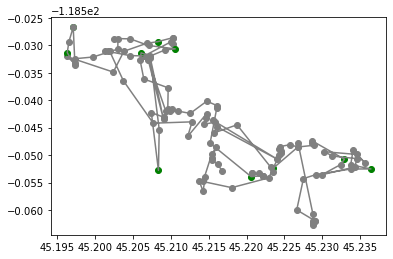

In [6]:
ip_coords = list(zip(interpolated_t1['lat'], interpolated_t1['lon']))
ft1_coords = list(zip(filtered_t1['lat'], filtered_t1['lon']))

fig1 = plt.figure()
ax1 = fig1.add_subplot()
for i in range(len(interpolated_t1)):
    if ip_coords[i] in ft1_coords:
        ax1.scatter(ip_coords[i][0], ip_coords[i][1], color='grey')
    else:
        ax1.scatter(ip_coords[i][0], ip_coords[i][1], color='green')

ax1.plot(interpolated_t1['lat'], interpolated_t1['lon'], color='grey')

In [7]:
kinematic_features.head()

lat         lon        Date      Time  \
traj_id   DateTime                                                           
960313E02 1996-05-02 18:53:37  45.216733 -118.552838  1996-05-02  18:53:37   
          1996-05-02 19:40:59  45.216209 -118.551677  1996-05-02  19:40:59   
          1996-05-02 20:31:30  45.215409 -118.550891  1996-05-02  20:31:30   
          1996-05-02 21:27:22  45.215414 -118.550509  1996-05-02  21:27:22   
          1996-05-02 22:25:17  45.215980 -118.548614  1996-05-02  22:25:17   

                              Day_Of_Week  Weekend Time_Of_Day  \
traj_id   DateTime                                               
960313E02 1996-05-02 18:53:37    Thursday    False     Evening   
          1996-05-02 19:40:59    Thursday    False     Evening   
          1996-05-02 20:31:30    Thursday    False     Evening   
          1996-05-02 21:27:22    Thursday    False       Night   
          1996-05-02 22:25:17    Thursday    False       Night   

                               Distance_prev_to_curr  Distance_start_to_curr  \
traj_id   DateTime                                                             
960313E02 1996-05-02 18:53:37                    NaN                     NaN   
          1996-05-02 19:40:59             107.991396              107.991396   
          1996-05-02 20:31:30             108.130110              211.923564   
          1996-05-02 21:27:22              29.922411              234.007053   
          1996-05-02 22:25:17             161.218678              341.235866   

                               Speed_prev_to_curr  Acceleration_prev_to_curr  \
traj_id   DateTime                                                             
960313E02 1996-05-02 18:53:37                 NaN                        NaN   
          1996-05-02 19:40:59            0.037998                        NaN   
          1996-05-02 20:31:30            0.035675              -7.666278e-07   
          1996-05-02 21:27:22            0.008927              -7.979713e-06   
          1996-05-02 22:25:17            0.046394               1.078191e-05   

                               Jerk_prev_to_curr  Bearing_between_consecutive  \
traj_id   DateTime                                                              
960313E02 1996-05-02 18:53:37                NaN                          NaN   
          1996-05-02 19:40:59                NaN                   122.674640   
          1996-05-02 20:31:30                NaN                   145.298059   
          1996-05-02 21:27:22      -2.151875e-09                    88.895424   
          1996-05-02 22:25:17       5.399028e-09                    67.029306   

                               Bearing_rate_from_prev  \
traj_id   DateTime                                      
960313E02 1996-05-02 18:53:37                     NaN   
          1996-05-02 19:40:59                     NaN   
          1996-05-02 20:31:30                0.007464   
          1996-05-02 21:27:22               -0.016827   
          1996-05-02 22:25:17               -0.006292   

                               Rate_of_bearing_rate_from_prev  
traj_id   DateTime                                             
960313E02 1996-05-02 18:53:37                             NaN  
          1996-05-02 19:40:59                             NaN  
          1996-05-02 20:31:30                        0.007464  
          1996-05-02 21:27:22                       -0.016827  
          1996-05-02 22:25:17                       -0.006292